<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row is an example| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|

Let’s say you want to predict some output value y, given some input value X. For example, maybe you want to predict your score on a test based on how many hours you sleep and how many hours you study the night before. To use a machine learning approach, we first need some data. Let’s say for the last three tests, you recorded your number of hours of studying, your number of hours sleeping, and your score on the test. We'll use the programming language python to store our data in 2-dimensional numpy arrays.

In [1]:
import numpy as np
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [4]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [5]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [6]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [7]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [8]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

Now that we have some data, we’re going to use it to train a model to predict how you will do on your next test, based on how many hours you sleep and how many hours you study. This is called a supervised regression problem. It’s supervised because our examples have inputs and outputs. It’s a regression problem because we’re predicting your test score, which is a continuous output. If we we’re predicting your letter grade, this would be called a classification problem, and not a regression problem.


Before we throw our data into the model, we need to account for the differences in the units of our data. Both of our inputs are in hours, but our output is a test score, scaled between 0 and 100. 

Now we can build our Neural Net. We know our network must have 2 inputs and 1 output, because these are the dimensions of our data. We’ll call our output y hat, because it’s an estimate of y, but not the same as y. Any layer between our input and output layer is called a hidden layer. Recently, researchers have built networks with many many hidden layers. These are known as a deep belief networks, giving rise to the term deep learning. Here, we’re going to use 1 hidden layer with 3 hidden units, but if we wanted to build a deep neural network, we would just stack a bunch of layers together.

<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, outputLayerSize) |

Our network has 2 inputs, 3 hidden units, and 1 output. These are examples of hyperparameters. Hyperparameters are constants that establish the structure and behavior of a neural network, but are not updated as we train the network. Our learning algorithm is not capable of, for example, deciding that it needs another hidden unit, this is something that WE must decide on before training. What a neural network does learn are parameters, specifically the weights on the synapses.

We’ll take care of moving data through our network in a method called forward. Rather than pass inputs through the network one at a time, we’re going to use matrices to pass through multiple inputs at once. Doing this allows for big computational speedups, especially when using tools like MATLAB or Numpy. Our input data matrix, X, is of dimension 3 by 2, because we have 3, 2-dimensional examples. Our corresponding output data, y, is of dimension 3 by 1.

In [9]:
print X.shape, y.shape

(3, 2) (3, 1)


Each input value, or element in matrix X, needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron. This is a complex operation, but if we take the three outputs we're looking for as a single row of a matrix, and place all our individual weights into a matrix of weights, we can create the exact behavior we need by multiplying our input data matrix by our weight matrix. Using matrix multiplication allows us to pass multiple inputs through at once by simply adding rows to the matrix X. From here on out, we'll refer to these matrics as X, W one, and z two, where z two the activity of our second layer. Notice that each entry in z is a sum of weighted inputs to each hidden neuron. Z is of size 3 by 3, one row for each example, and one column for each hidden unit. 

We now have our first official formula, $z^{(2)} = XW^{(1)}$. Matrix notation is really nice here, becuase it allows us to express the complex underlying process in a single line!

Now that we have the activities for our second layer, z two, we need to apply the activation function. We'll independently apply the function to each entry in matrix z using a python method for this called sigmoid, because we’re using a sigmoid as our activation function. Using numpy is really nice here, because we can pass in a scalar, vector, or matrix, Numpy will apply the activation function element-wise, and return a result of the same dimension as it was given.

In [10]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

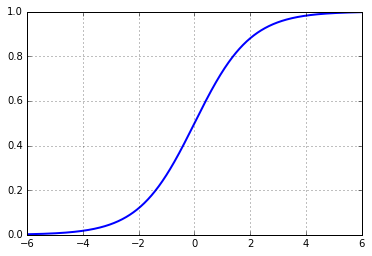

In [11]:
import matplotlib.pyplot as plt
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, sigmoid(testInput), linewidth= 2)
plt.grid(1)
plt.show()

In [12]:
sigmoid(1)

0.7310585786300049

In [13]:
sigmoid(np.array([-1,0,1]))

array([ 0.26894142,  0.5       ,  0.73105858])

 We now have our second formula for forward propagation, using f to denote our activation function, we can write that a two, our second layer activity, is equal to f of z two. a two will be a matrix of the same size as z two, 3 by 3.

$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$

We can initialize the network we built last time and pass in our normalized data, X, using our forward method, and have a look at our estimate of y, yHat.

In [14]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
    
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    

In [15]:
NN = Neural_Network()

yHat = NN.forward(X)


In [16]:
yHat

array([[ 0.69405427],
       [ 0.69368203],
       [ 0.73196479]])

In [17]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

Right now our predictions are pretty inaccurate. To improve our model, we first need to quantify exactly how wrong our predictions are. We'll do this with a cost function. A cost function allows us to express exactly how wrong or "costly" our models is, given our examples.

$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}
$$

OUR cost is a function of two things, our examples, and the weights on our synapses. We don't have much control of our data, so we'll minimize our cost by changing the weights.

Let's return to the 1-dimensional case and see if we can be more clever. Let's evaluate our cost function for a specific value of w. If w is 1.1 for example, we can run our cost function, and see that J is 2.8. Now we haven't learned much yet, but let's try to add a little information to what we already know. What if we could figure out which way was downhill? If we could, we would know whether to make W smaller or larger do decrease the cost. We could test the cost function immediately to the left and right of our test point and see which is smaller. This is called numerical estimation, and is sometimes a good approach, but for us, there's a faster way. Let's look at our equations so far.

$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$
$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$
$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$
$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}\\
$$

We have 5 equations, but we can really think of them as one big equation.


And since we have one big equation that uniquely determines our cost, J, from X, y, W1, and W2, we can use our good friend calculus to find what we're looking for. We want to know "which way is downhill", that is, what is the rate of change of J with respect to W, also known as the derivative. And in this case, since we’re just considering one weight at a time, the partial derivative. 

We can derive an expression for dJdW, that will give us the rate of change of J with respect to W, for any value of W! If dJdW is positive, then the cost function is going uphill. If dJdW is negative the cost function is going downhill. 

This method is known as gradient descent, and although it may not seem so impressive in one dimension, it is capable of incredible speedups in higher dimensions. 

<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, outputLayerSize) |
|J | $$J$$ | Cost | (1, outputLayerSize) |
|dJdz3 | $$\frac{\partial J}{\partial z^{(3)} } = \delta^{(3)}$$ | Partial derivative of cost with respect to $z^{(3)}$ | (numExamples,outputLayerSize)|
|dJdW2|$$\frac{\partial J}{\partial W^{(2)}}$$|Partial derivative of cost with respect to $W^{(2)}$|(hiddenLayerSize, outputLayerSize)|
|dz3dz2|$$\frac{\partial z^{(3)}}{\partial z^{(2)}}$$|Partial derivative of $z^{(3)}$ with respect to $z^{(2)}$|(numExamples, hiddenLayerSize)|
|dJdW1|$$\frac{\partial J}{\partial W^{(1)}}$$|Partial derivative of cost with respect to $W^{(1)}$|(inputLayerSize, hiddenLayerSize)|
|delta2|$$\delta^{(2)}$$|Backpropagating Error 2|(numExamples,hiddenLayerSize)|
|delta3|$$\delta^{(3)}$$|Backpropagating Error 1|(numExamples,outputLayerSize)|

 we  use gradient descent to train our Neural Network, so it could make better predictions of your score on a test based on how many hours you slept, and how many hours you studied the night before. To perform gradient descent, we need an equation and some code for our gradient, dJ/dW.  

Our weights, W, are spread across two matrices, W1 and W2. We’ll separate our dJ/dW computation in the same way, by computing dJdW1 and dJdW2 independently. We should have just as many gradient values as weight values, so when we’re done, our matrices dJdW1 and dJdW2 will be the same size as W1 and W2.

$$
\frac{\partial J}{\partial W^{(2)}} = \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}
$$

Let’s work on dJdW2 first. The sum in our cost function adds the error from each example to create our overall cost. We’ll take advantage of the sum rule in differentiation, which says that the derivative of the sums equals the sum of the derivatives. We can move our sigma outside and just worry about the derivative of the inside expression first. 

$$
\frac{\partial J}{\partial W^{(2)}} = \sum \frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}
$$

To keep things simple, we’ll temporarily forget about our summation. Once we’ve computed dJdW for a single example, we’ll add all our individual derivative terms together. 

We can now evaluate our derivative. The power rule tells us to bring down our exponent, 2, and multiply. To finish our derivative, we’ll need to apply the chain rule. 

The chain rule tells us how to take the derivative of a function inside of a function, and generally says we take the derivative of the outside function and then multiply it by the derivative of the inside function. 

One way to express the chain rule is as the product of derivatives, this will come in very handy as we progress through backpropagation. In fact, a better name for backpropagation might be: don’t stop doing the chain rule. ever. 

We’ve taken the derivative of the outside of our cost function - now we need to multiply it by the derivative of the inside.

Y is just our test scores, which won’t change, so the derivative of y, a constant, with respect to W two is 0! yHat, on the other hand, does change with respect to W two, so we’ll apply the chain rule and multiply our results by minus dYhat/dW2. 

$$
\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}}
$$

We now need to think about the derivative of yHat with respect to W2. Equation 4 tells us that yHat is our activation function of z3, so we it will be helpful to apply the chain rule again to break dyHat/dW2 into dyHat/dz3 times dz3/dW2. 

$$
\frac{\partial J}{\partial W^{(2)}} = 
-(y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}  
\frac{\partial z^{(3)}}{\partial W^{(2)}}
$$

To find the rate of change of yHat with respect to z3, we need to differentiate our sigmoid activation function with respect to z. 

$$
f(z) = \frac{1}{1+e^{-z}}
$$

$$
f^\prime(z) = \frac{e^{-z}}{(1+e^{-z})^2}
$$

In [18]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J

    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  

        return dJdW1, dJdW2

    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params

    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [19]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

In [20]:
def sigmoidPrime(z):
    #Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

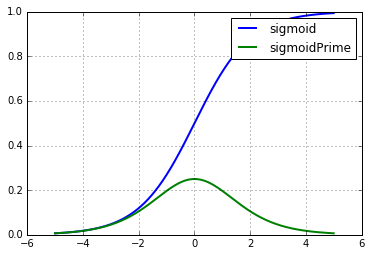

In [21]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues), linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])
plt.show()

In [22]:
def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2

def logistic(x):
    return 1/(1 + np.exp(-x))

def logistic_derivative(x):
    return logistic(x)*(1-logistic(x))

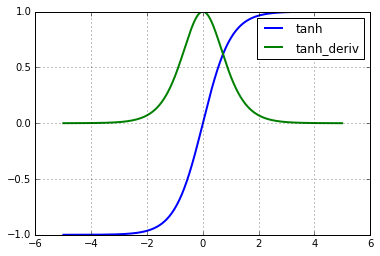

In [23]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, tanh(testValues), linewidth=2)
plt.plot(testValues, tanh_deriv(testValues), linewidth=2)
plt.grid(1)
plt.legend(['tanh', 'tanh_deriv'])
plt.show()

We can now replace dyHat/dz3 with f prime of z 3.

$$
\frac{\partial J}{\partial W^{(2)}}= 
-(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(2)}}
$$

Our final piece of the puzzle is dz3dW2, this term represents the change of z, our third layer activity, with respect to the weights in the second layer.

Z three is the matrix product of our activities, a two, and our weights, w two. The activities from layer two are multiplied by their correspond weights and added together to yield z3. If we focus on a single synapse for a moment, we see a simple linear relationship between W and z, where a is the slope. So for each synapse, dz/dW(2) is just the activation, a on that synapse!

$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$

Another way to think about what the calculus is doing here is that it is “backpropagating” the error to each weight, by multiplying by the activity on each synapses, the weights that contribute more to the error will have larger activations, and yield larger dJ/dW2 values, and those weights will be changed more when we perform gradient descent. 

We need to be careful with our dimensionality here, and if we’re clever, we can take care of that summation we got rid of earlier. 

The first part of our equation, y minus yHat is of the same dimension as our output data, 3 by 1. 

F prime of z three is of the same size, 3 by 1, and our first operation is scalar multiplication. Our resulting 3 by 1 matrix is referred to as the backpropagating error, delta 3.

We determined that dz3/dW2 is equal to the activity of each synapse. Each value in delta 3 needs to be multiplied by each activity. We can achieve this by transposing a2 and matrix multiplying by delta3. 

$$
\frac{\partial J}{\partial W^{(2)}} = 
(a^{(2)})^T\delta^{(3)}\tag{6}
$$

$$
\delta^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)}) 
$$

Another way to think about what’s happening here is that is that each example our algorithm sees has a certain cost and a certain gradient. The gradient with respect to each example pulls our gradient descent algorithm in a certain direction. It's like every example gets a vote on which way is downhill, and when we perform batch gradient descent we just add together everyone’s vote, call it downhill, and move in that direction.

In [24]:
# Part of NN Class (won't work alone, needs to be included in class as 
# shown in below and in partFour.py):

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)

We have one final term to compute: dJ/dW1. The derivation begins the same way, computing the derivative through our final layer: first dJ/dyHat, then dyHat/dz3, and we called these two taken together form our backpropagating error, delta3. We now take the derivative “across” our synapses, this is a little different from out job last time, computing the derivative with respect to the weights on our synapses. 

$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}
\frac{\partial z^{(3)}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(1)}}
$$

$$
\frac{\partial z^{(3)}}{\partial W^{(1)}} = \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$


There’s still a nice linear relationship along each synapse, but now we’re interested in the rate of change of z(3) with respect to a(2). Now the slope is just equal to the weight value for that synapse. We can achieve this mathematically by multiplying by W(2) transpose. 

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial z^{(2)}}
\frac{\partial z^{(2)}}{\partial W^{(1)}}
$$

Our next term to work on is da(2)/dz(2) – this step is just like the derivative across our layer 3 neurons, so we can just multiply by f prime(z2). 

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
\frac{\partial z^{(2)}}{\partial W^{(1)}}
$$

Our final computation here is dz2/dW1. This is very similar to our dz3/dW2 computation, there is a simple linear relationship on the synapses between z2 and w1, in this case though, the slope is the input value, X. We can use the same technique as last time by multiplying by X transpose, effectively applying the derivative and adding our dJ/dW1’s together across all our examples. 

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}
\delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$

Or:

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}\delta^{(2)} \tag{7}
$$

$$
\delta^{(2)} = \delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$

All that’s left is to code this equation up in python. What’s cool here is that if we want to make a deeper neural network, we could just stack a bunch of these operations together. 

In [25]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        

In [27]:
NN=Neural_Network()
cost1 = NN.costFunction(X,y)


In [28]:
cost1

array([ 0.00881479])

cost1

In [29]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)


In [30]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

So far we’ve built a neural network in python, computed a cost function to let us know how well our network is performing, computed the gradient of our cost function so we can train our network, and last time we numerically validated our gradient computations. After all that work, it’s finally time to train our neural network. 

In [31]:
from scipy import optimize

In [32]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

If we plot the cost against the number of iterations through training, we should see a nice, monotonically decreasing function. Further, we see that the number of function evaluations required to find the solution is less than 100, and far less than the 10^27 function evaluation that would have been required to find a solution by brute force, as shown in part 3. Finally, we can evaluate our gradient at our solution and see very small values – which make sense, as our minimum should be quite flat.

In [33]:
NN = Neural_Network()

In [34]:
T = trainer(NN)

In [35]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 55
         Gradient evaluations: 55


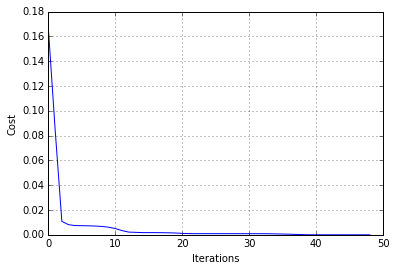

In [36]:
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [37]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [38]:
allOutputs = NN.forward(allInputs)

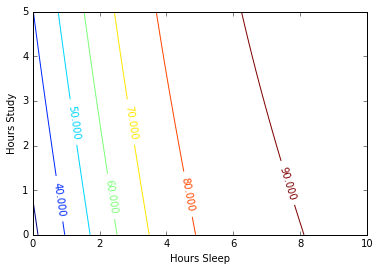

In [39]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')
plt.show()

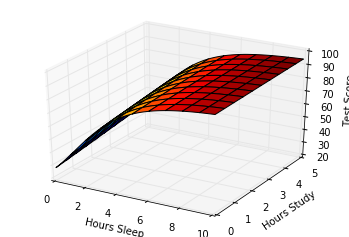

In [40]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=plt.cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')
plt.show()

In [41]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad